# Adidas_US_Sales Analysis Portfolio Project

### Introduction 

This is a sales data analysis portfolio project of Adidas US Sales datset. The dataset used for the analysis is downloaded from kaggle website(kaggle.com). In this project, I will try to do basic data analysis to figure out the strengths and weakness in the sales operation. Also, I will provide this analysis with visualizations to make clear of results. 

Data is in tabular format(.csv file) of 13 columns and 9648 records. Those columns are:
Retailer, Retailer ID, InvoiceDate, Region, State, City, Product, Price per Unit, Units Sold,
TotalSales, Operating Profit, Operating Margin Percentage, Sales Method.


In the beginning, let's import some libraries which I will be using in the Analysis, then pull the dataset file(.csv file) "adidas_us_sales.csv" into python and store it in a dataframe named "Adidas_Sales" using pandas library.

In [1]:
# importing libraries

import numpy as np 
import pandas as pd 
import matplotlib as mlp
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from datetime import datetime, timedelta


In [2]:
# reading csv file

Adidas_Sales = pd.read_csv\
(r'D:\PC\PC Files\Data Science\# Datasets\Adidas_US_Sales\Adidas_US_Sales\Adidas_US_Sales.csv')


***

### Exploring Data 

At First, I will explore the dataset by displaying general information about the data and sales operation to see how further analysis will go.

In [3]:
# data preview 

Adidas_Sales.head() 


,Retailer,Retailer ID,InvoiceDate,Region,State,City,Product,Price per Unit,Units Sold,TotalSales,Operating Profit,Operating Margin Percentage,Sales Method
0,Foot Locker,1185732,1-Jan-20,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2-Jan-20,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,3-Jan-20,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,4-Jan-20,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,5-Jan-20,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
# display columns and data types

Adidas_Sales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Retailer                     9648 non-null   object 
 1   Retailer ID                  9648 non-null   int64  
 2   InvoiceDate                  9648 non-null   object 
 3   Region                       9648 non-null   object 
 4   State                        9648 non-null   object 
 5   City                         9648 non-null   object 
 6   Product                      9648 non-null   object 
 7   Price per Unit               9648 non-null   float64
 8   Units Sold                   9648 non-null   int64  
 9   TotalSales                   9648 non-null   float64
 10  Operating Profit             9648 non-null   float64
 11  Operating Margin Percentage  9648 non-null   float64
 12  Sales Method                 9648 non-null   object 
dtypes: float64(4), int

As shown in the above cell, we have 6 columns with numerical data and their data types are 
defined perfectly, and 6 columns with text data their types are defined perfectly. 
however, There is one column that represent dates, so it will be converted from object to date in data preperation step.

***

Now, let's explore Retailer and Retailer ID columns.

In [4]:
# Retailer & Retailer ID

print(pd.Series(Adidas_Sales['Retailer'].unique()),
      pd.Series(Adidas_Sales['Retailer ID'].unique()), sep = '\n')


0      Foot Locker
1          Walmart
2    Sports Direct
3        West Gear
4           Kohl's
5           Amazon
dtype: object
0    1185732
1    1197831
2    1128299
3    1189833
dtype: int64


We have 6 Retailers, but only 4 Retailer IDs, so we may have 2 scenarios:
1. There are some Retailers have no Retailer ID, i.e: Null Retailer ID.
2. There are more than one retailer that share the same Retailer ID.

Let's assume first scenario and check if there are some retailers with null Retailer ID.

In [6]:
# finding nulls in Retailer ID column 

Adidas_Sales['Retailer ID'].isnull().sum(axis = 0)  


0

As shown, there are no null values in Retailer ID column, hence it's the second scenario. Let's find the Retailers which are sharing same Retailer ID.

In [7]:
# Retailers sharing same Retailer ID

unique_Retailers = Adidas_Sales['Retailer'].unique()
for i in range(0,6):
    print(Adidas_Sales[Adidas_Sales['Retailer'] == unique_Retailers[i]].head(1))
    

      Retailer  Retailer ID InvoiceDate     Region     State      City  \
0  Foot Locker      1185732    1-Jan-20  Northeast  New York  New York   

                 Product  Price per Unit  Units Sold  TotalSales  \
0  Men's Street Footwear            50.0        1200    600000.0   

   Operating Profit  Operating Margin Percentage Sales Method  
0          300000.0                          0.5     In-store  
   Retailer  Retailer ID InvoiceDate     Region     State      City  \
46  Walmart      1185732   17-Apr-20  Northeast  New York  New York   

          Product  Price per Unit  Units Sold  TotalSales  Operating Profit  \
46  Men's Apparel            60.0         900    540000.0          162000.0   

    Operating Margin Percentage Sales Method  
46                          0.3       Outlet  
         Retailer  Retailer ID InvoiceDate     Region     State      City  \
68  Sports Direct      1197831   19-Jul-20  Northeast  New York  New York   

                  Product  Price pe

***

We have 3 Retailers with the same Retailer ID: 

Foot Locker, Walmart, Amazon -- 1185732

As a result, we cannot use Retailer ID Values to represent distinct Retailers in the analysis.

***

Now, let's explore some other columns.

In [8]:
# Region

pd.Series(Adidas_Sales['Region'].unique())


0    Northeast
1        South
2         West
3      Midwest
4    Southeast
dtype: object

In [9]:
# State

pd.Series(Adidas_Sales['State].unique())
                       

0           New York
1              Texas
2         California
3           Illinois
4       Pennsylvania
5             Nevada
6           Colorado
7         Washington
8            Florida
9          Minnesota
10           Montana
11         Tennessee
12          Nebraska
13           Alabama
14             Maine
15            Alaska
16            Hawaii
17           Wyoming
18          Virginia
19          Michigan
20          Missouri
21              Utah
22            Oregon
23         Louisiana
24             Idaho
25           Arizona
26        New Mexico
27           Georgia
28    South Carolina
29    North Carolina
30              Ohio
31          Kentucky
32       Mississippi
33          Arkansas
34          Oklahoma
35            Kansas
36      South Dakota
37      North Dakota
38              Iowa
39         Wisconsin
40           Indiana
41     West Virginia
42          Maryland
43          Delaware
44        New Jersey
45       Connecticut
46      Rhode Island
47     Massac

In [10]:
# City

pd.Series(Adidas_Sales['City'].unique())


0           New York
1            Houston
2      San Francisco
3        Los Angeles
4            Chicago
5             Dallas
6       Philadelphia
7          Las Vegas
8             Denver
9            Seattle
10             Miami
11       Minneapolis
12          Billings
13         Knoxville
14             Omaha
15        Birmingham
16          Portland
17         Anchorage
18          Honolulu
19           Orlando
20            Albany
21          Cheyenne
22          Richmond
23           Detroit
24         St. Louis
25    Salt Lake City
26       New Orleans
27             Boise
28           Phoenix
29       Albuquerque
30           Atlanta
31        Charleston
32         Charlotte
33          Columbus
34        Louisville
35           Jackson
36       Little Rock
37     Oklahoma City
38           Wichita
39       Sioux Falls
40             Fargo
41        Des Moines
42         Milwaukee
43      Indianapolis
44         Baltimore
45        Wilmington
46            Newark
47          H

In [11]:
# Product

pd.Series(Adidas_Sales['Product'].unique())


0        Men's Street Footwear
1      Men's Athletic Footwear
2      Women's Street Footwear
3    Women's Athletic Footwear
4                Men's Apparel
5              Women's Apparel
dtype: object

In [12]:
# Sales Method

pd.Series(Adidas_Sales['Sales Method'].unique())


0    In-store
1      Outlet
2      Online
dtype: object

***

### Data Preperation (including Data Cleaning)

let's check whether the data is having null values and duplicates or not.

In [13]:
# checking data for nulls 

Adidas_Sales.isnull().sum(axis = 0)  


Retailer                       0
Retailer ID                    0
InvoiceDate                    0
Region                         0
State                          0
City                           0
Product                        0
Price per Unit                 0
Units Sold                     0
TotalSales                     0
Operating Profit               0
Operating Margin Percentage    0
Sales Method                   0
dtype: int64

As shown in the above cell, no null values exist in the entire dataset.

In [14]:
# checking data for duplicates

print(Adidas_Sales['Retailer'].tail(1))  
Adidas_Sales = Adidas_Sales.drop_duplicates()  
print(Adidas_Sales['Retailer'].tail(1))  


9647    Foot Locker
Name: Retailer, dtype: object
9647    Foot Locker
Name: Retailer, dtype: object


As shown in the above cell, no duplicates are found in the dataset.

In [15]:
# convert InvoiceDate column data type to datetime 

Adidas_Sales['InvoiceDate'] = pd.to_datetime(Adidas_Sales['InvoiceDate'])


***

### Data Analysis

In [16]:
# InvoiceDate 

print('Start Date     ', datetime.date(min(Adidas_Sales['InvoiceDate'])))
print('End Date       ', datetime.date(max(Adidas_Sales['InvoiceDate'])))
print('Count of Days  ', (max(Adidas_Sales['InvoiceDate'])-min(Adidas_Sales['InvoiceDate'])).days)


Start Date      2020-01-01
End Date        2021-12-31
Count of Days   730


In [31]:
Adidas_Sales.groupby('State')['TotalSales'].sum()


State
Alabama           17633424.0
Alaska            14753103.0
Arizona           15782221.0
Arkansas          12639347.0
California        60174133.0
Colorado          20996536.0
Connecticut       11573448.0
Delaware          12298412.0
Florida           59283714.0
Georgia           18997466.0
Hawaii            22282457.0
Idaho             19276878.0
Illinois           9797488.0
Indiana            8836198.0
Iowa               7424011.0
Kansas             9972864.0
Kentucky          10072848.0
Louisiana         23750781.0
Maine              9195978.0
Maryland           7758059.0
Massachusetts     11076810.0
Michigan          18625433.0
Minnesota          7378068.0
Mississippi       15591709.0
Missouri           9683265.0
Montana           15710886.0
Nebraska           5929038.0
Nevada            20858509.0
New Hampshire     16411667.0
New Jersey         9934246.0
New Mexico        19865016.0
New York          64229039.0
North Carolina    23956531.0
North Dakota       7735580.0
Ohio    

In [26]:
Adidas_Sales.groupby('City')['TotalSales'].sum()

City
Albany            24427804.0
Albuquerque       19865016.0
Anchorage         14753103.0
Atlanta           18997466.0
Baltimore          7758059.0
Billings          15710886.0
Birmingham        17633424.0
Boise             19276878.0
Boston            11076810.0
Burlington        14352923.0
Charleston        39974797.0
Charlotte         23956531.0
Cheyenne          18577517.0
Chicago            9797488.0
Columbus          18484583.0
Dallas            20902864.0
Denver            20996536.0
Des Moines         7424011.0
Detroit           18625433.0
Fargo              7735580.0
Hartford          11573448.0
Honolulu          22282457.0
Houston           25456882.0
Indianapolis       8836198.0
Jackson           15591709.0
Knoxville         18067440.0
Las Vegas         20858509.0
Little Rock       12639347.0
Los Angeles       25634913.0
Louisville        10072848.0
Manchester        16411667.0
Miami             31600863.0
Milwaukee          7727469.0
Minneapolis        7378068.0
New Orlea

Let's apply correlation concept to numerical column data and see how they are affecting each other.

In [17]:
# defining correlation matrix

Corr_Mat = Adidas_Sales.corr(method = 'pearson')
Corr_Mat

,Retailer ID,Price per Unit,Units Sold,TotalSales,Operating Profit,Operating Margin Percentage
Retailer ID,1.000000,-0.391684,-0.003194,-0.083580,-0.027137,0.216780
Price per Unit,-0.391684,1.000000,0.265869,0.435811,0.394546,-0.137486
Units Sold,-0.003194,0.265869,1.000000,0.913431,0.892379,-0.305479
TotalSales,-0.083580,0.435811,0.913431,1.000000,0.956307,-0.364592
Operating Profit,-0.027137,0.394546,0.892379,0.956307,1.000000,-0.211921
Operating Margin Percentage,0.216780,-0.137486,-0.305479,-0.364592,-0.211921,1.000000


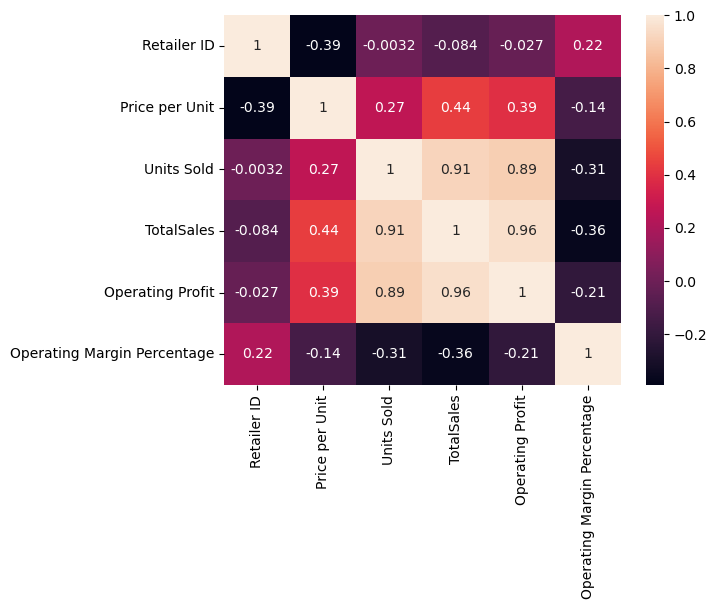

In [18]:
# present correlation matrix as heatmap

sns.heatmap(Corr_Mat, annot = True)
plt.show()

***

### Data Visualization

In [19]:
%matplotlib inline
plt.style.use('default') 

let's begin by display the total sales of each retailer to see which retailer has the highest sales amount and which retailer has the lowest sales and that needs to be improved.

In [20]:
Adidas_Sales.groupby('Retailer')['TotalSales'].sum()

Retailer
Amazon            77698912.0
Foot Locker      220094720.0
Kohl's           102114753.0
Sports Direct    182470997.0
Walmart           74558410.0
West Gear        242964333.0
Name: TotalSales, dtype: float64

let's plot this result.

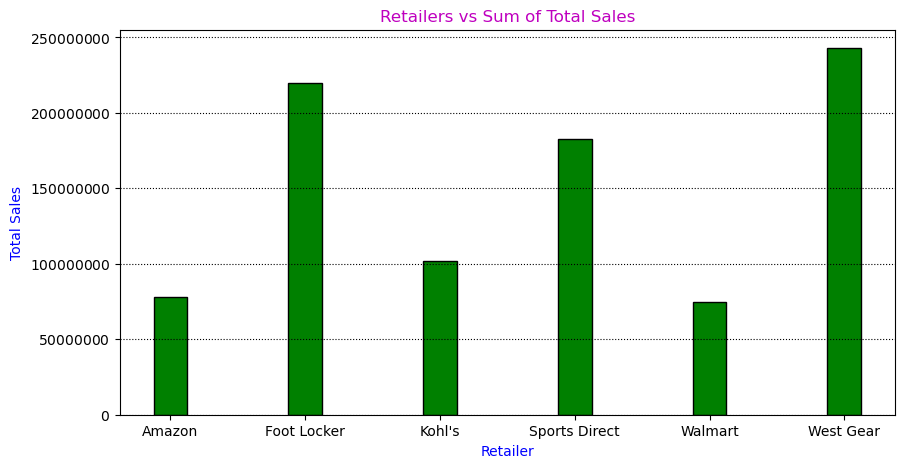

In [21]:
# plotting Retailer vs TotalSales

plt.figure(figsize = (10,5))
Adidas_Sales.groupby('Retailer')['TotalSales'].sum().plot(kind = 'bar', color = 'g', edgecolor = 'k',
                                                         width = 0.25)
plt.title('Retailers vs Sum of Total Sales', color = 'm')
plt.xlabel('Retailer', color = 'b')
plt.ylabel('Total Sales', color = 'b')
plt.xticks(rotation = None)
plt.ticklabel_format(axis='y', style = 'plain', useMathText = True)
plt.grid(axis = 'y', linestyle = ':', color = 'black')
plt.show()

It is obvious from chart above, West Gear and Foot Locker are dominating the sales, on the contrary 
Amazon and Walmart have the lowest sales amount.

***

Now, I'm going to check the total sales by different regions.

In [22]:
Adidas_Sales.groupby('Region')['TotalSales'].sum()

Region
Midwest      135800459.0
Northeast    186324067.0
South        144663181.0
Southeast    163171236.0
West         269943182.0
Name: TotalSales, dtype: float64

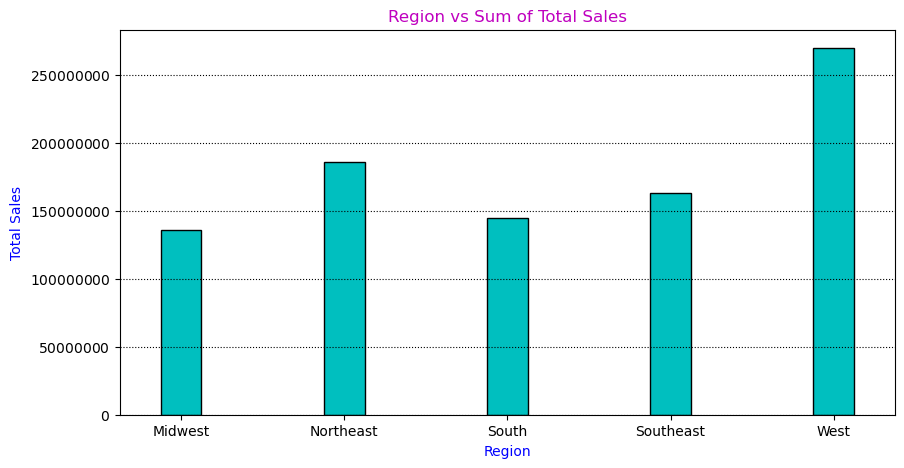

In [23]:
# plotting Region vs TotalSales 

plt.figure(figsize = (10,5))
Adidas_Sales.groupby('Region')['TotalSales'].sum().plot(kind = 'bar', color = 'c', width = 0.25, 
                                                       edgecolor = 'k')
plt.title('Region vs Sum of Total Sales', color = 'm')
plt.xlabel('Region', color = 'b')
plt.ylabel('Total Sales', color = 'b')
plt.xticks(rotation = None)
plt.ticklabel_format(axis='y', style = 'plain', useMathText = True)
plt.grid(axis = 'y', linestyle = ':', color = 'black')
plt.show()

West Region has the highest sales amount, and Midwest Region is the least.

***

let's visualize the total sales by invoice date records.

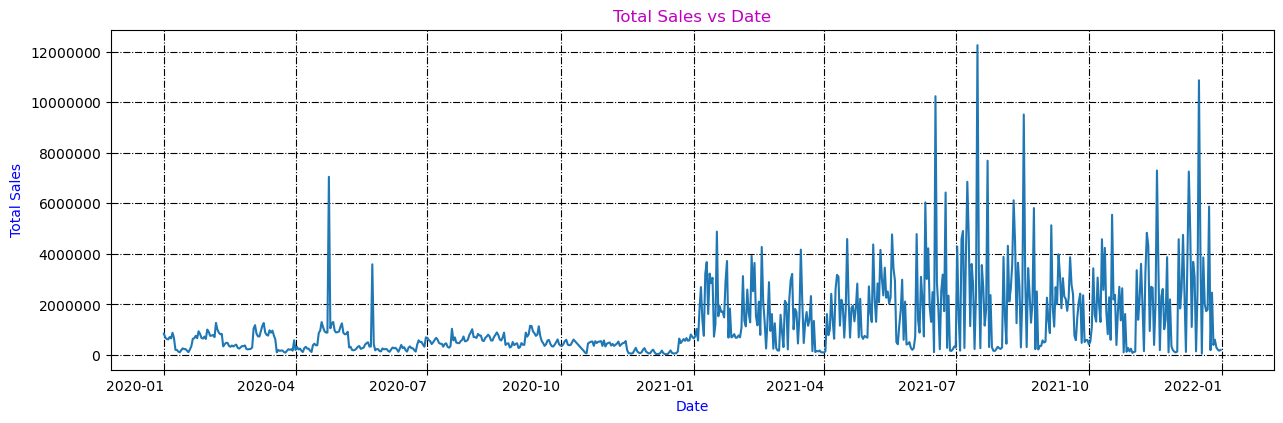

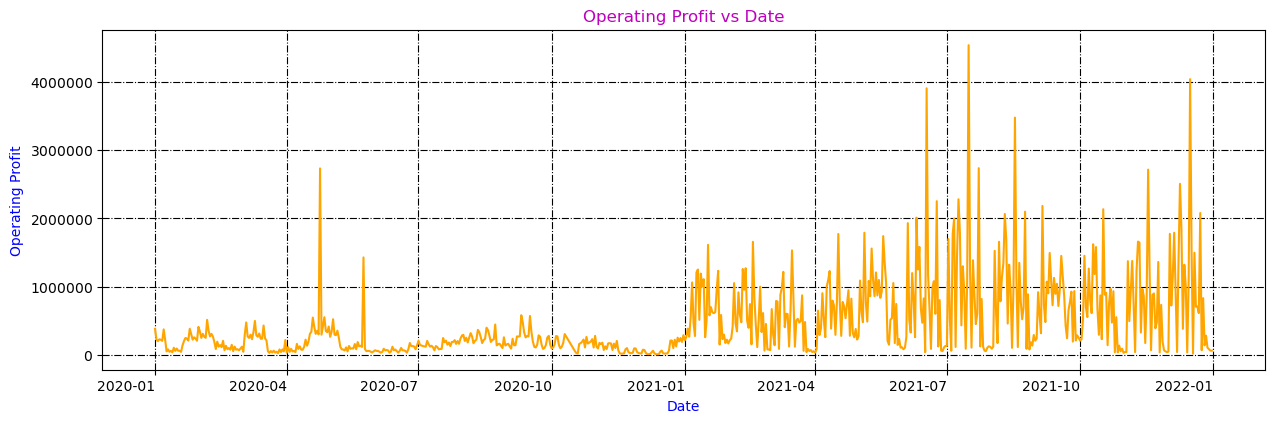

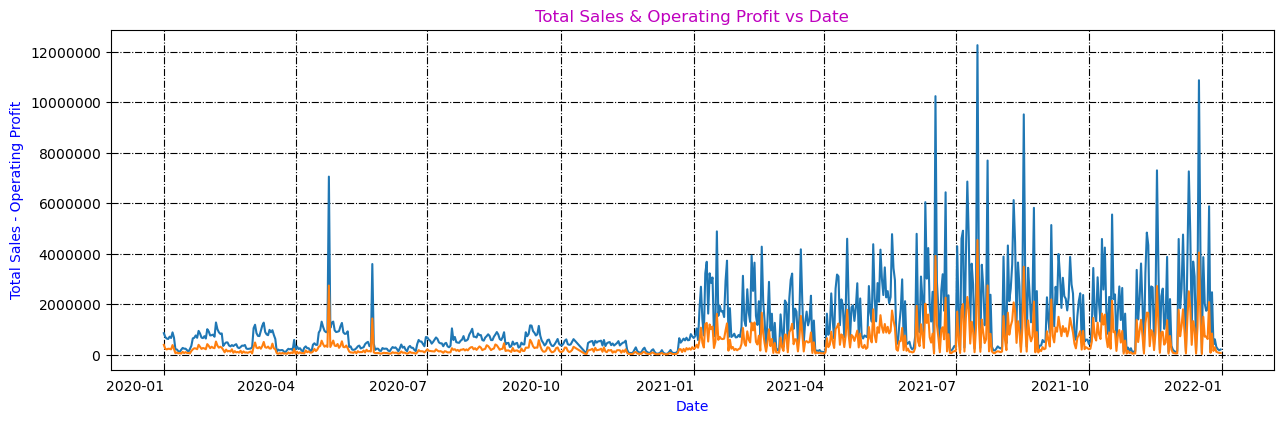

In [24]:
# Total Sales by Invoice Date


plt.figure(figsize = (15,5))
Adidas_Sales.groupby('InvoiceDate')['TotalSales'].sum().plot(kind = 'line')
plt.title('Total Sales vs Date', color = 'm')
plt.xlabel('Date', color = 'b')
plt.ylabel('Total Sales', color = 'b')
plt.xticks(rotation = None)
plt.ticklabel_format(axis='y', style = 'plain', useMathText = True)
plt.grid( linestyle = '-.', color = 'black')
plt.show()

plt.figure(figsize = (15,5))
Adidas_Sales.groupby('InvoiceDate')['Operating Profit'].sum().plot(kind = 'line', color = 'orange')
plt.title('Operating Profit vs Date', color = 'm')
plt.xlabel('Date', color = 'b')
plt.ylabel('Operating Profit', color = 'b')
plt.xticks(rotation = None)
plt.ticklabel_format(axis='y', style = 'plain', useMathText = True)
plt.grid( linestyle = '-.', color = 'black')
plt.show()

plt.figure(figsize = (15,5))
# plt.plot(Adidas_Sales.groupby('InvoiceDate')['TotalSales'].sum())
Adidas_Sales.groupby('InvoiceDate')['TotalSales'].sum().plot(kind = 'line')
Adidas_Sales.groupby('InvoiceDate')['Operating Profit'].sum().plot(kind = 'line')
plt.title('Total Sales & Operating Profit vs Date', color = 'm')
plt.xlabel('Date', color = 'b')
plt.ylabel('Total Sales - Operating Profit', color = 'b')
plt.xticks(rotation = None)
plt.ticklabel_format(axis='y', style = 'plain', useMathText = True)
plt.grid( linestyle = '-.', color = 'black')
plt.show()

The sales amount was low in 2020, by the beginning of 2021, the sales went high espically in the middle of this year (June - Aug). 

let's see which sales method is the most favourite by customers.

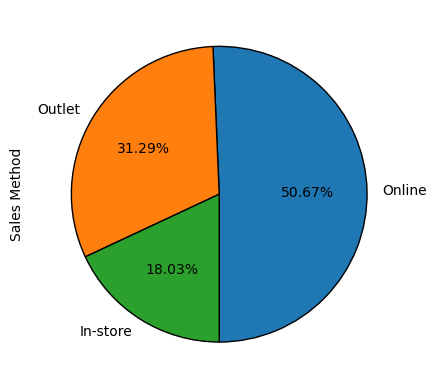

In [25]:
# Sales Method 

Adidas_Sales['Sales Method'].value_counts().plot(kind = 'pie', autopct = '%1.2f%%' , 
                                                startangle = 270, wedgeprops = {'edgecolor': 'black'})
plt.show()

Online Sales are having the highest share of Sales Methods.

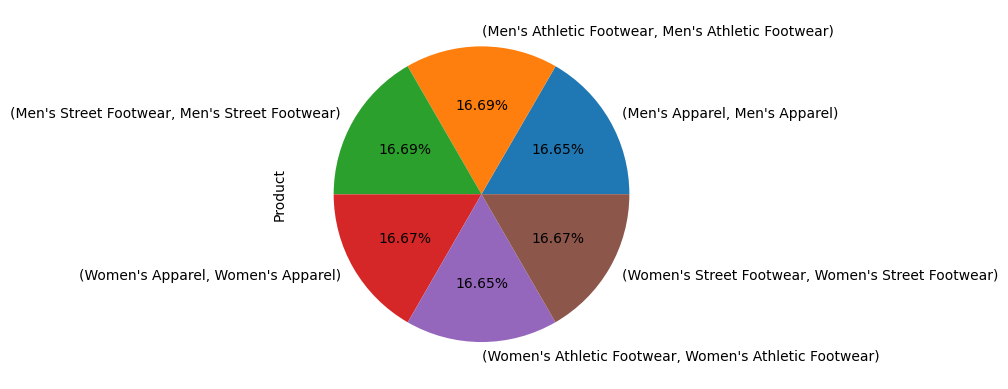

In [49]:
Adidas_Sales.groupby('Product')['Product'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%')
# y = Adidas_Sales['Units Sold'].value_counts()
# z = x*y
# z
# x.plot(kind = 'pie', autopct = '%1.2f%%' , 
#                                                  wedgeprops = {'edgecolor': 'black'})
plt.show()